<a href="https://colab.research.google.com/github/ashwinsinha32/Project1Redo/blob/main/Project1_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Ashwin Sinha

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. You can find the data on Blackboard. 

I will be using the Happiness dataset:


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
happy =pd.read_csv('/content/drive/MyDrive/CS167Spring22/datasets/happiness_data.csv')
happy.head()

Mounted at /content/drive


,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# Problem: 
Which dataset are you going to use? What questions are you going to ask about this dataset? Make sure that you can answer the question using ML models. What are your predictor variables and target variable?

I will be using the Happiness dataset to determine which countries have the highest happiness score given the numerous features we have available, from generosity levels to life expectancy predictions. With this information, we can evaluate a country's happiness ranking, along with predicting the general pleasure one might gain from living in a country. Target Variable = Score |
Predictor Variables = GDP per capita, generosity, freedom to make life choices, and social support and family.

# Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

The original dataset has 2,580 rows, but after dropping rops that contained a value of "Unrated" in the Stars category, we reduced it down to 2,577 rows.  We then needed to convert NaN values in the "Top Ten" category to zero to do our analysis.  Additionally, I created a couple different subsets based on different predictors as well as a subset that contained all the values of the highest rating "Top Ten" values since 2012.  This subset called TopRamen contains 37 rows.  TopRamenHQ shows which countries the best ramen are from, along with the brand and a couple other features.  Lastly, we created dummy variables to give binary nunmbers to the brand and style of ramen so that we can convert them to a quantitative figure.

In [2]:
# data prep code 
happy.shape

(782, 10)

In [3]:
happy['GDP per capita'].isnull().values.any()
happy['Social support and Family'].isnull().values.any()
happy['Generosity'].isnull().values.any()
happy['Freedom to make life choices'].isnull().values.any()


print("after: ", happy.shape)

after:  (782, 10)


In [4]:
happy2 = happy.dropna( subset = ['Country or region']).copy()
print("after: ", happy2.shape)

after:  (782, 10)


In [5]:
happy2 = happy[happy2["Year"].astype(str).str.contains('2018')]
happy2.head()

,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

We will be doing a regression algorithm to determine how the machine can assess happiness levels agains the overall ranking in column 1.  We will use the r^2 value to assess the performance of the models.  This is appropriate as r^2 values can measure regression models instead of using accuracy.

# Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

The baseline for our metrics is around an accuracy score of .0174.  This is a dummy classifier algorithm that removes Country from the dataset, and then evaluates its accuracy on how well the model did to predict which country a new ramen review is from.  This is the "unsmart" model that would happen if you guessed randomly each time.

In [6]:
# build and test a baseline model here
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

predictors = ['GDP per capita', 'Social support and Family', 'Freedom to make life choices', 'Generosity']
target = 'Score'

train_data, test_data, train_sln, test_sln = train_test_split(happy[predictors], happy[target], test_size = 0.2, random_state = 41)
train_data.head()

baseline = DummyRegressor()
baseline.fit(train_data, train_sln)
baseline_pred = baseline.predict(test_data)

print('r^2: ', metrics.r2_score(test_sln, baseline_pred))

r^2:  -0.0005261696220115741


# Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one.


In [7]:
# Execute your plan here (build and test your models to answer your question)

# knn
import numpy as np
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

knn = neighbors.KNeighborsRegressor(n_neighbors=25)
knn.fit(train_data,train_sln)
happy_preds = knn.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, happy_preds))

r^2:  0.7592632189911994


In [8]:
#Weighted knn
wknn = neighbors.KNeighborsRegressor(n_neighbors=25, weights = 'distance')
wknn.fit(train_data,train_sln)
whappy_preds = wknn.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, whappy_preds))

r^2:  0.7718920142168043


In [9]:
#Decision Tree
from sklearn import tree
from sklearn import metrics

dt = tree.DecisionTreeRegressor(random_state = 40)
dt.fit(train_data,train_sln)
dt_happy_preds = dt.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, dt_happy_preds))

r^2:  0.6051901153153285


In [10]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 40)
rf.fit(train_data, train_sln)
rf_preds = rf.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, rf_preds))

r^2:  0.7929901560577577


# Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune. 

For the knn and weighted knn models, I played around with different k values to maximize the r^2 value.  I found that the range of 20-30 for k value were the strongest, with 25 being the peak of that metric.  The r^2 values for these models were .759 for the knn, and .771 for the weighted knn model.

For the decision tree and random forest models, I used a random state @40 to evaluate the model and make it reproducible. The r^2 values for these models were .605 for the decision tree, and .793 for the random forest.

In [11]:
# Include code to show your results (graphs, etc)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

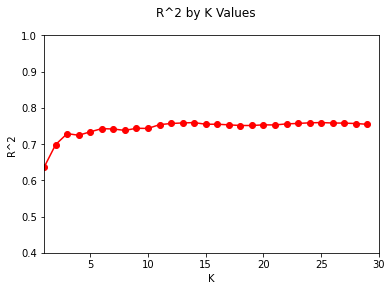

r^2:  0.7592632189911994


In [13]:
  #knn
  def r2(k):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_data, train_sln)
    preds = knn.predict(test_data)
    knn_r2 = metrics.r2_score(test_sln, preds)
    return knn_r2

# populate the series list
  points = 30
  series = []
  for i in range (1, points):
    val = r2(i)
    series.append(val)

  xvals = range(1, points)
  plt.suptitle('R^2 by K Values')
  plt.plot(xvals, series, 'ro-')
  plt.axis([1, 30, 0.4, 1])
  plt.xlabel('K')
  plt.ylabel('R^2')
  plt.show()

knn = neighbors.KNeighborsRegressor(n_neighbors=25)
knn.fit(train_data,train_sln)
happy_preds = knn.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, happy_preds))

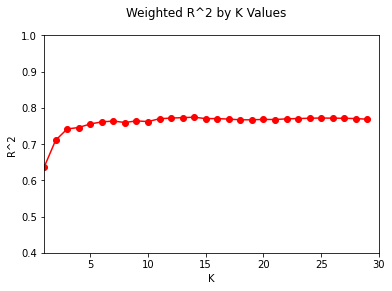

r^2:  0.7718920142168043


In [18]:
 #w_knn
 def w_r2(k):
   wknn = neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'distance')
   wknn.fit(train_data, train_sln)
   preds = wknn.predict(test_data)
   wknn_r2 = metrics.r2_score(test_sln, preds)
   return wknn_r2

# populate the series list
 points = 30
 series = []
 for i in range (1, points):
    val = w_r2(i)
    series.append(val)

 xvals = range(1, points)
 plt.suptitle('Weighted R^2 by K Values')
 plt.plot(xvals, series, 'ro-')
 plt.axis([1, 30, 0.4, 1])
 plt.xlabel('K')
 plt.ylabel('R^2')
 plt.show()

wknn = neighbors.KNeighborsRegressor(n_neighbors=25, weights = 'distance')
wknn.fit(train_data,train_sln)
whappy_preds = wknn.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, whappy_preds))

In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

def dt_r2(train, test, train_sln, test_sln, max_dep):
  tree = DecisionTreeRegressor(random_state = 41, max_depth=max_dep)
  tree.fit(train, train_sln)
  pred = tree.predict(test)
  r2 = metrics.r2_score(test_sln, pred)
  return r2

In [31]:
dt_results = DecisionTreeRegressor(random_state = 41, max_depth = 5)
dt_results.fit(train_data, train_sln)
dt_results_predict = dt_results.predict(test_data)

print('r^2: ', metrics.r2_score(test_sln, dt_results_predict))

r^2:  0.7443015382297515


In [36]:
#Random Forest
def rf_r2(train, test, train_sln, test_sln, n_est, max_dep):
  forest = RandomForestRegressor(random_state = 41, 
                                 n_estimators=n_est, max_depth=max_dep)
  forest.fit(train, train_sln)
  pred = forest.predict(test)
  r2 = metrics.r2_score(test_sln, pred)
  return r2

In [46]:
forest_results = RandomForestRegressor(random_state = 41, max_depth = 8, n_estimators = 120)
forest_results.fit(train_data, train_sln)
forest_results_predict = forest_results.predict(test_data)

print('r^2: ', metrics.r2_score(test_sln, forest_results_predict))

r^2:  0.7924431192813701


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

In [52]:
#Normalized knn
knneighbors = neighbors.KNeighborsRegressor(n_neighbors=5, weights = 'distance')
knneighbors.fit(train_data_normalized, train_sln)
knnpredictions = knneighbors.predict(test_data_normalized)

print('r^2: ', metrics.r2_score(test_sln, knnpredictions))

r^2:  0.7893448528554704


In [53]:
#Normalized weighted-kNN
wknneighbors = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')
wknneighbors.fit(train_data_normalized, train_sln)
wknnpredictions = wknneighbors.predict(test_data_normalized)

print('r^2: ', metrics.r2_score(test_sln, wknnpredictions))

r^2:  0.7847720642392453


In [61]:
#Normalized decision tree
normaldt = DecisionTreeRegressor(random_state = 41, max_depth = 5)
normaldt.fit(train_data, train_sln)
dtpredictions = normaldt.predict(test_data)

print('r^2: ', metrics.r2_score(test_sln, dtpredictions))

r^2:  0.7443015382297515


In [59]:
#Normalized Random forest
normalrf = RandomForestRegressor(random_state = 41, max_depth = 8, n_estimators = 120)
normalrf.fit(train_data, train_sln)
normalrfpredictions = normalrf.predict(test_data)

print('r^2: ', metrics.r2_score(test_sln, normalrfpredictions))

r^2:  0.7924431192813701


# Bumps in the Road:
What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


I had many different challenges when working with the ramen dataset.  Particularly, my analysis wasn't conducive to actually finding the country or origin of ramen based on its features.  Due to this and other coding issues, I chose to go with the happiness dataset as I was far more comfortable doing r^2 regression analysis than a classification problem which might not have had a high accuracy score in the first place.  I had trouble graphing the decision trees and random forests, which took up lots of time researching and going through old class lectures to find a similar example.  Other graphs for knn and w-knn I could do, but I ended up with numerous errors when graphing these, so I ommitted the work.  Another challenge from this dataset was normalizing the results, as it has been awhile since I have done this in the class.  Once I found the write setup on how to write the code, make the predictions, and test the predictions against the testing solutions, I was able to copy this down for the other algorithms.  Apart from these main challenges, I was able to get positive r^2 results which I am happy about, and will conduct further analysis below.

# Conclusions
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Algorithms:
KNN: .759
wKNN: .772
Decision Tree: .744
Random Forest: .792

Normalized Algorithms:
KNN: .789
wKNN: .785
Decision Tree: .744
Random Forest: .792

The model that performed the best was the random forest at .79 of an r^2 value, with knn and wknn models following close behind at .78.  I found it interesting that the normalization process did not change the r^2 value for the decision trees and random forest, unlike the knn and wknn where they boht improve massive from the normalization.  This could be because these tree-based models might not require scaling to the extent that nearest neighbors had, as their weighting of different attributes is analyzed far differently than  nearest neighbors.  From the graphs, we can see that no matter how many k values are inputted, the r^2 value stayed around .76 and .77 for the knn and wknn models respectively.  Based on class discussions revolving around the pros and cons of different models, its not surprise that the random forest algorithm had the highest r^2 value.  Due to its versatility in learning from the model's past outputs for future inputs is a crucial aspect to dtermining which factors are seen as more prevelant and influential whend determining the happiness ranking.  Based on these factors, I would reccomend using the random forest algorithm to determine a country's happiness score based on their GDP per capita, social support and family, freedom to make life choices, and generosity levels.